In [137]:
import matplotlib.pyplot as plt
def show(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [142]:
# Import libraries
from plantcv import plantcv as pcv 

class options:
    def __init__(self):
        #self.image = '../../leafsnap/leafsnap-dataset/dataset/images/field/acer_rubrum/13001155906945.jpg'
        self.image = '../images/raws/acer_rubrum/13001155906945.jpg'
        self.debug = "none"
        self.writeimg= 'False' 
        self.result = "features_metadata.json"
        self.outdir = ""
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug
pcv.params.debug = args.debug

In [143]:
img, path, filename = pcv.readimage(filename="../../leafsnap/leafsnap-dataset/dataset/images/field/acer_saccharinum/13001158000696.jpg")

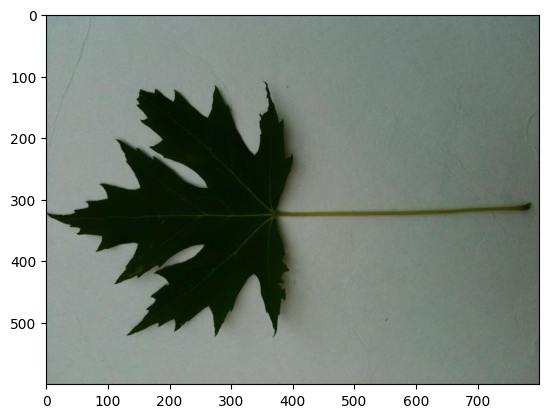

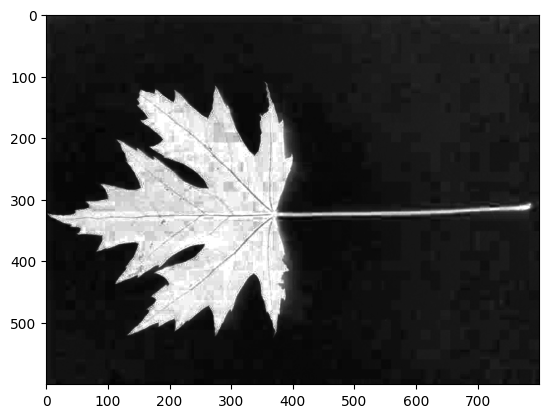

RGB to HSV


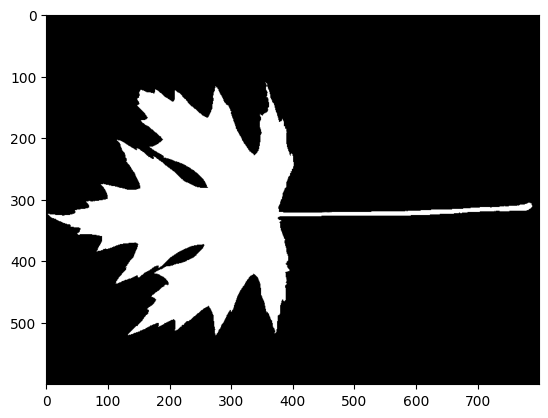

Threshold Saturation Image


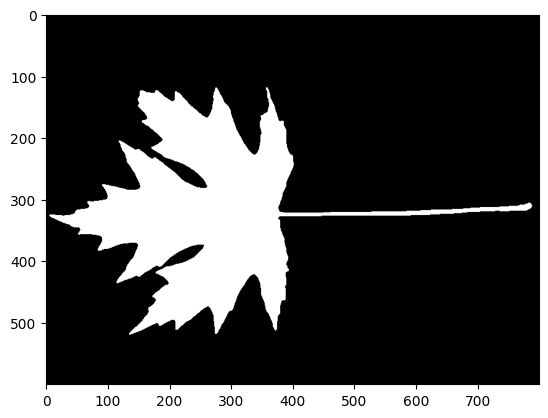

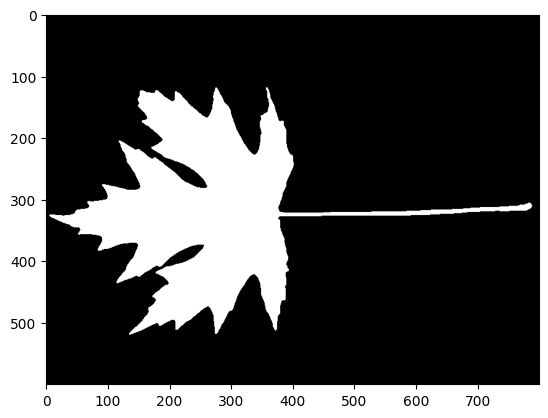

Median Blur


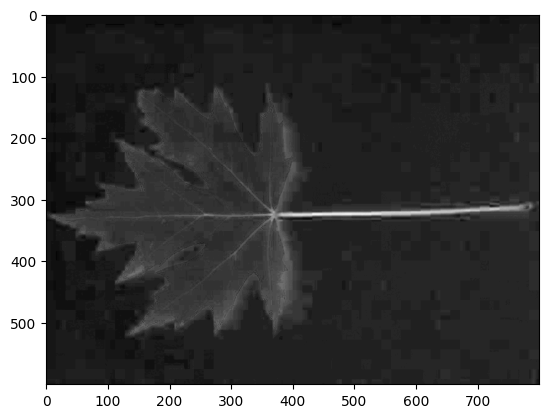

Extract Blue Channel


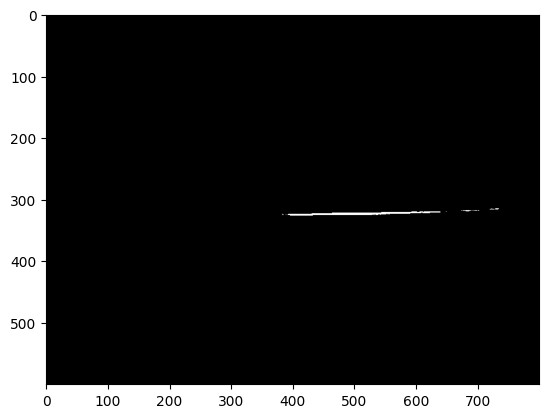

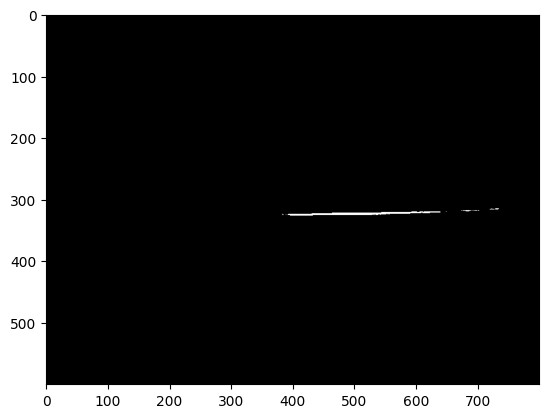

Threshold Blue Image


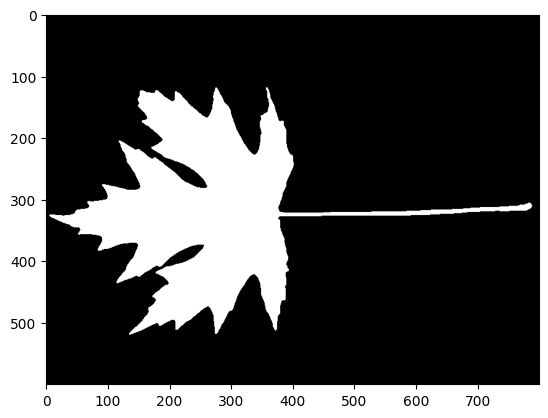

Join Thresholded saturation and blue-yellow imaes


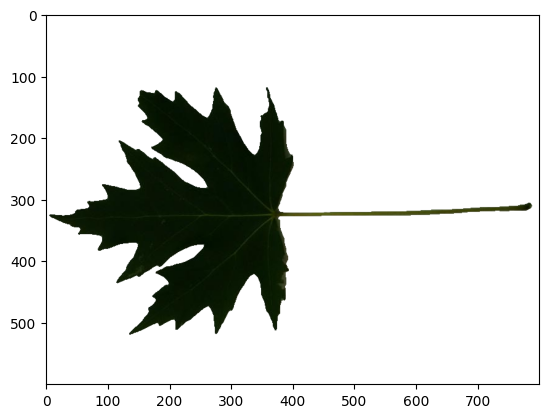

Apply Mask


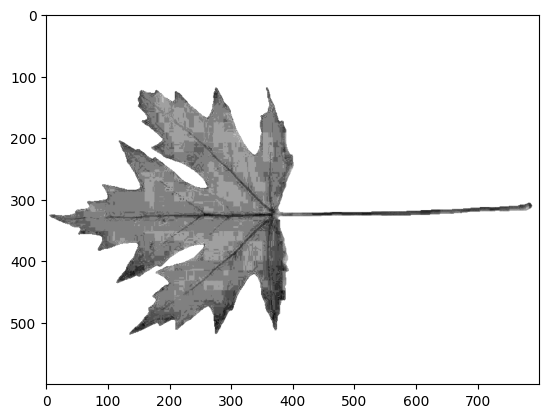

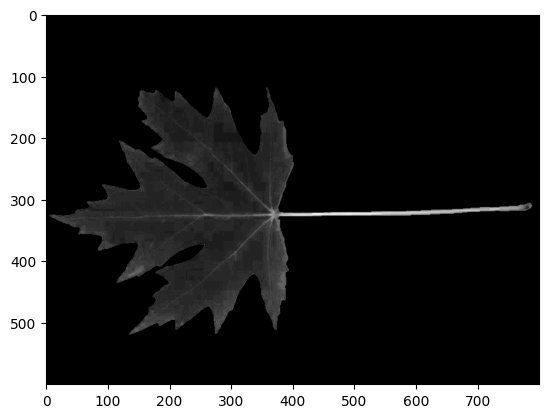

Extract green-magenta and blue-yellow channels


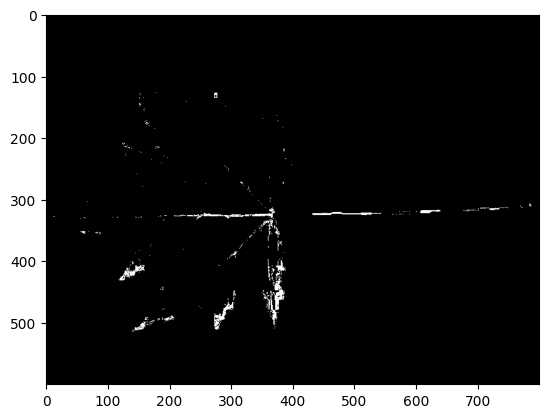

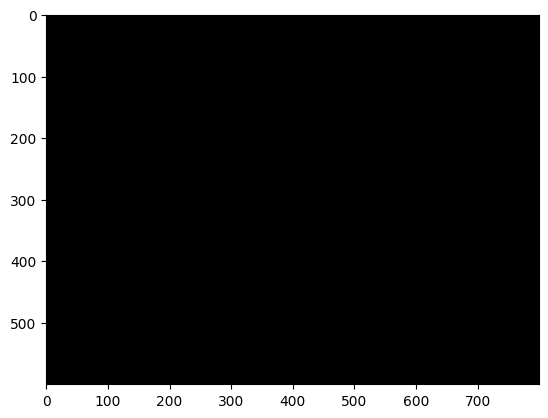

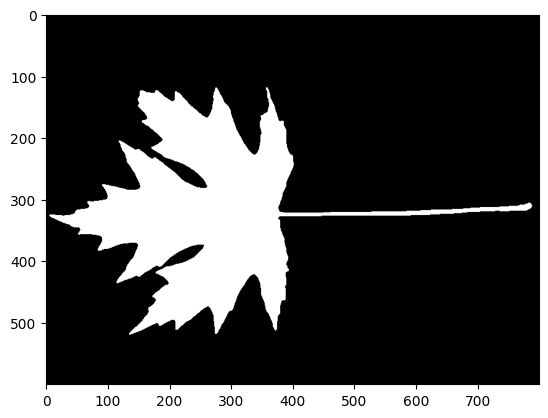

Thresold Green-magenda and blue images


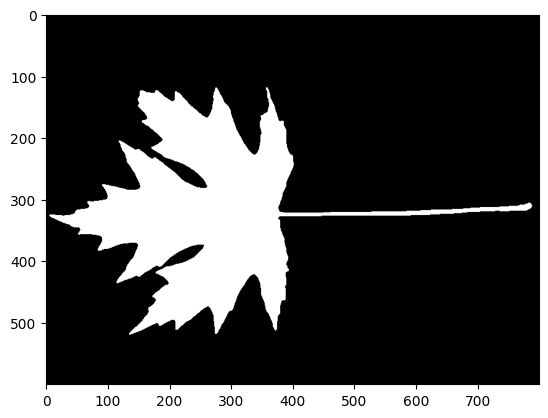

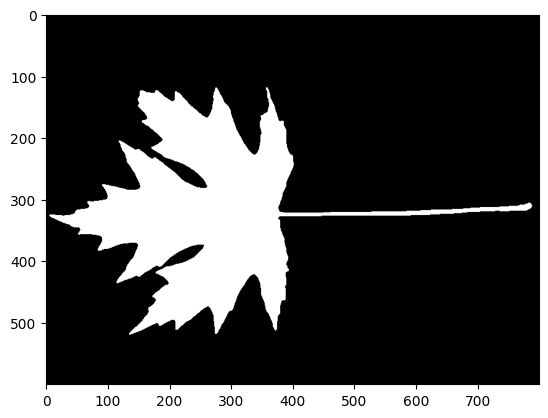

Join Threshold saturation and blue-yellow images


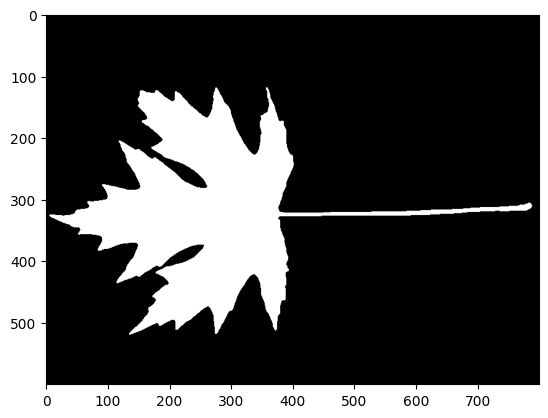

Fill small objects


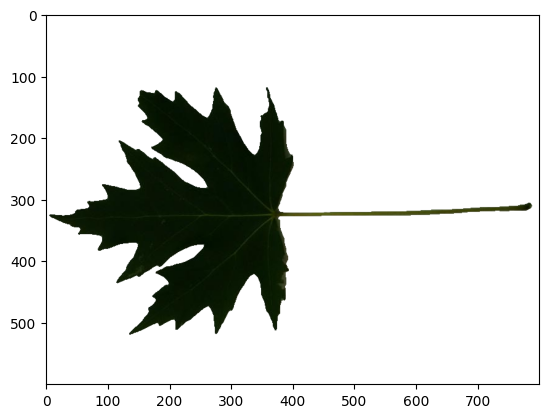

Apply 2nd Masked


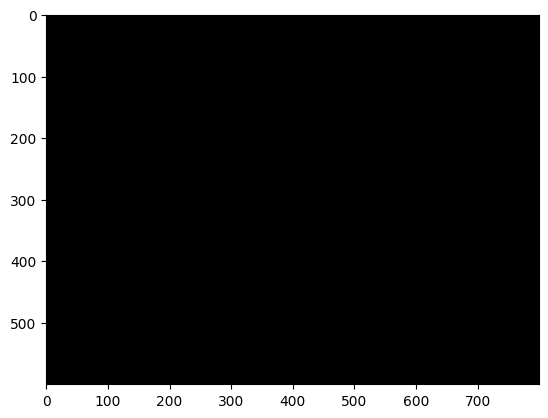

Skeletonize


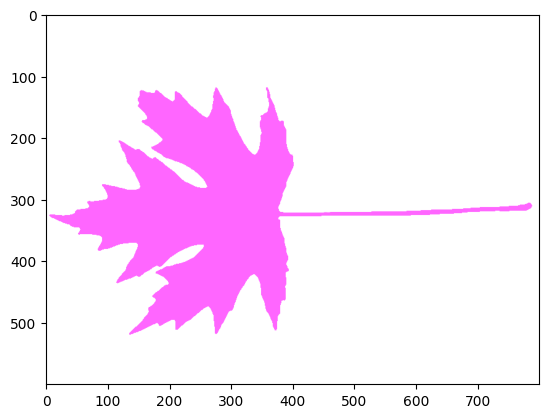

Identify Objects original
[array([[[275, 119]],

       [[275, 120]],

       [[274, 121]],

       ...,

       [[278, 121]],

       [[277, 120]],

       [[276, 119]]], dtype=int32)]



Derivative: [-0.32111456 -0.16055728  0.03555728 ...  0.04419417 -0.08944272
 -0.08838835]
Integral: 302.67859460101624
Total: 302.67859460101624


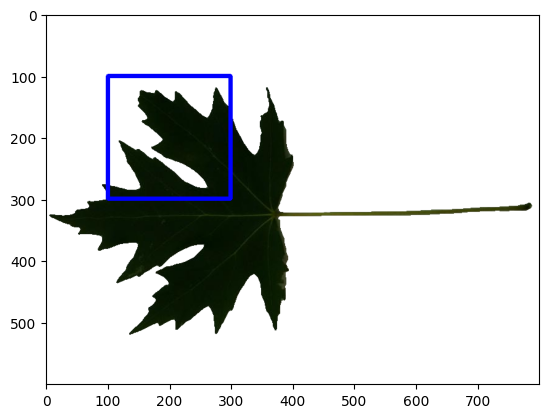

Define Region of Interest


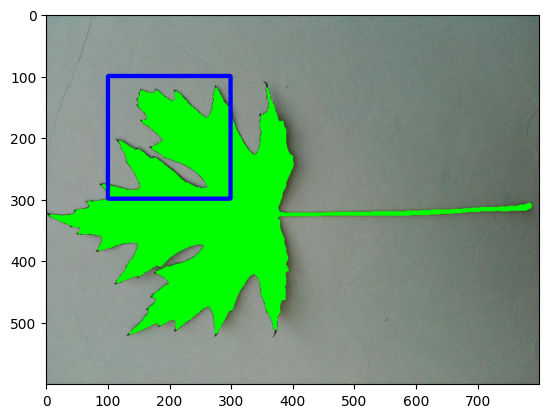

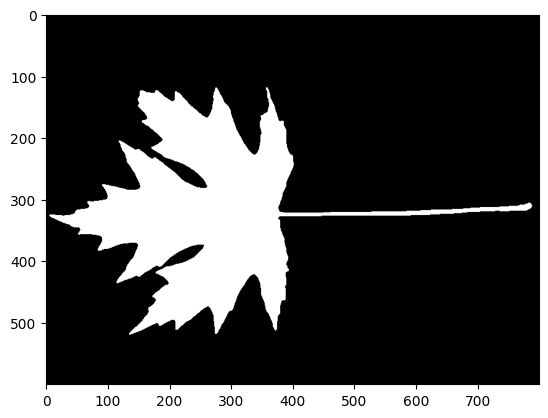

Decide which objects to keep


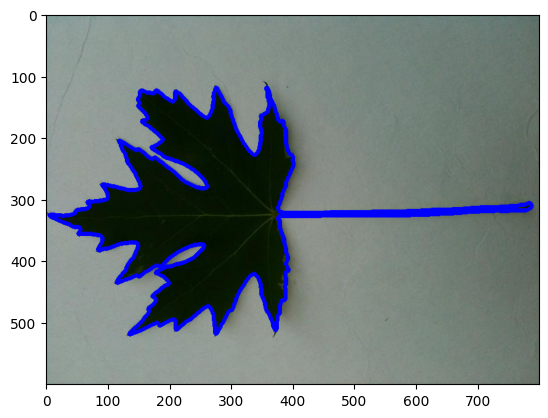

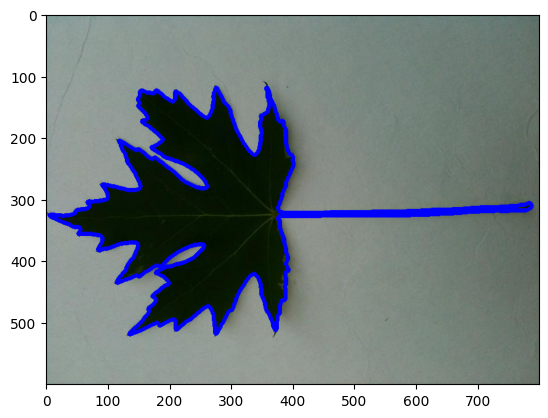

Combine kept objects


In [140]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
import scipy.integrate

# https://www.delftstack.com/howto/numpy/curvature-formula-numpy/
def compute_curvature(x, y): # get circle first // radius points inside 
    dx_dt = np.gradient(x)
    dy_dt = np.gradient(y)
    d2x_dt2 = np.gradient(dx_dt)
    d2y_dt2 = np.gradient(dy_dt)
    curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / ((dx_dt ** 2 + dy_dt ** 2) ** 1.5)
    return curvature


def compute_curvature_derivative(curvature):
    curvature_derivative = np.gradient(curvature)
    return curvature_derivative


def compute_curvature_integral(curvature):
    curvature_integral = np.trapz(curvature)
    return curvature_integral


# img, path, filename = pcv.readimage(filename=args.image)
img, path, filename = pcv.readimage(filename="../../leafsnap/leafsnap-dataset/dataset/images/field/acer_saccharinum/13001158000696.jpg")

# Convert RGB to HSV and extract the saturation channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
print("RGB to HSV")

# Threshold the saturation image
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
print("Threshold Saturation Image")

# Median Blur
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=5)
print("Median Blur")

# Convert RGB to LAB and extract the Blue channel
#b = pcv.rgb2gray_lab(gray_img=img, channel='b')
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
print("Extract Blue Channel")

# Threshold the blue image
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
print("Threshold Blue Image")

# Fill small objects
# b_fill = pcv.fill(b_thresh, 10)

# Join the thresholded saturation and blue-yellow images
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)
print("Join Thresholded saturation and blue-yellow imaes")

# Apply Mask (for VIS images, mask_color=white)
#masked = pcv.apply_mask(rgb_img=img, mask=bs, mask_color='white')
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')
print("Apply Mask")
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')
print("Extract green-magenta and blue-yellow channels")

# Threshold the green-magenta and blue images
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')
print("Thresold Green-magenda and blue images")

# Join the thresholded saturation and blue-yellow images (OR)
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)
print("Join Threshold saturation and blue-yellow images")

# Fill small objects
ab_fill = pcv.fill(bin_img=ab, size=200)
print("Fill small objects")

# Apply mask (for VIS images, mask_color=white)
#masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')
print("Apply 2nd Masked")

skeleton = pcv.morphology.skeletonize(mask=masked2)
print("Skeletonize")

# Identify objects
id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
print("Identify Objects original")

print(id_objects)

# Compute curvature of leaf contour
contour = id_objects[0]
curvature = compute_curvature(contour[:,0,0], contour[:,0,1])

# Compute curvature derivative
curvature_derivative = compute_curvature_derivative(curvature)
# Compute curvature integral
curvature_integral = compute_curvature_integral(curvature)
# Total curvature is the absolute value of the curvature integral
total_curvature = np.abs(curvature_integral)

print(f"\n\n\nDerivative: {curvature_derivative}")
print(f"Integral: {str(curvature_integral)}")
print(f"Total: {str(total_curvature)}")





# # Identify objects 2
# id_objects2, obj_hierarchy2 = pcv.find_objects(img=s_thresh, mask=s)
# print("Identify Objects binary")

# # Select the first contour (assuming there is only one)
# contour = id_objects2[0]

# # Fit parabolas to small segments of the contour and compute the curvature at each point
# segment_size = 10
# curvatures = []
# for i in range(segment_size, len(contour) - segment_size, segment_size):
#     x = contour[i-segment_size:i+segment_size+1, 0]
#     y = contour[i-segment_size:i+segment_size+1, 1]
#     a, b, c = pcv.fit_parabola(x, y)
#     curvature = abs(2*a) / ((1 + b**2)**(3/2))
#     curvatures.append(curvature)

# # Compute the curvature derivative for the contour
# curvature_derivative = np.gradient(curvatures)
# # Compute the curvature integral and total curvature for the contour
# curvature_integral = np.trapz(curvatures)
# total_curvature = abs(curvature_integral)

# print("Curvature:", curvatures)
# print("Curvature derivative:", curvature_derivative)
# print("Curvature integral:", curvature_integral)
# print("Total curvature:", total_curvature)


# Define ROI
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=100, y=100, h=200, w=200)
print("Define Region of Interest")

# Decide which objects to keep
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')
print("Decide which objects to keep")

# Object combine kept objects
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)
print("Combine kept objects")

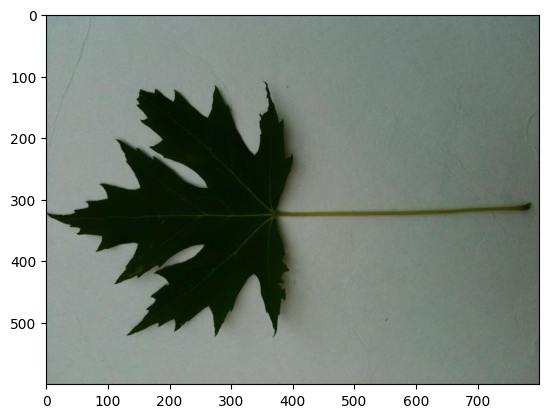

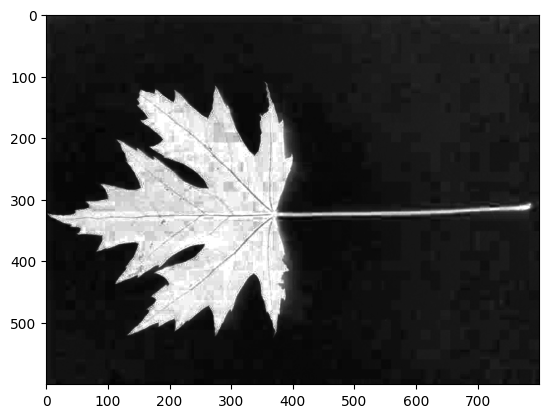

RGB to HSV


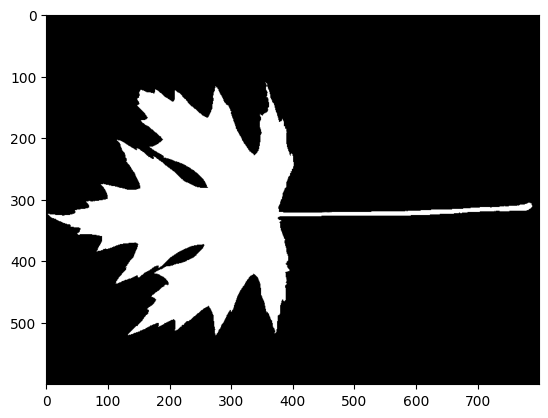

Threshold Saturation Image


In [141]:
# img, path, filename = pcv.readimage(filename=args.image)
img, path, filename = pcv.readimage(filename="../../leafsnap/leafsnap-dataset/dataset/images/field/acer_saccharinum/13001158000696.jpg")

# Convert RGB to HSV and extract the saturation channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
print("RGB to HSV")

# Threshold the saturation image
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
print("Threshold Saturation Image")

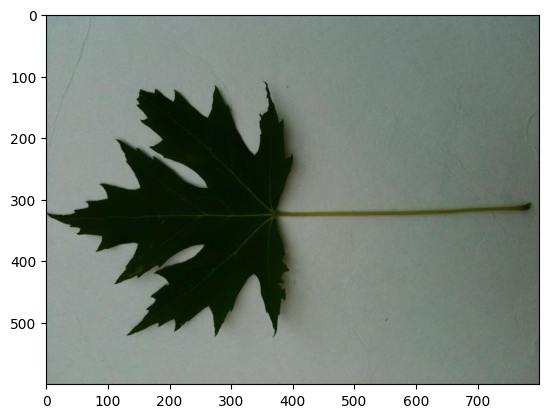

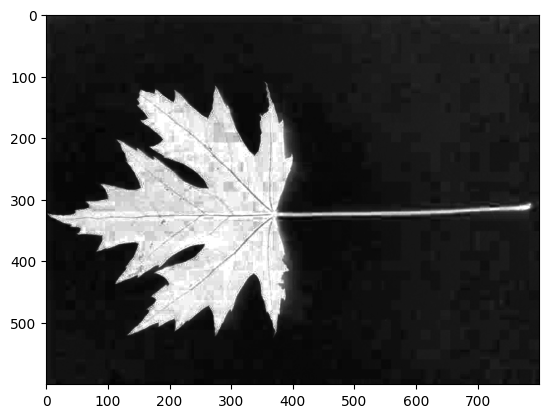

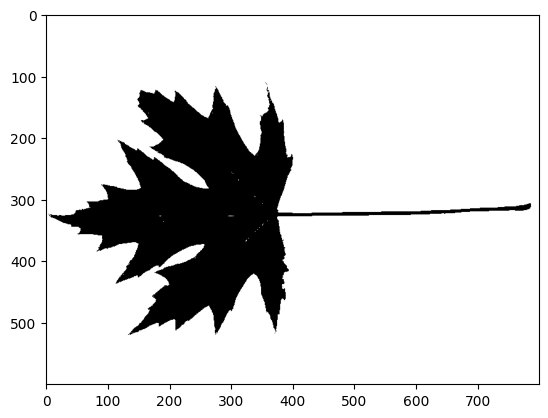

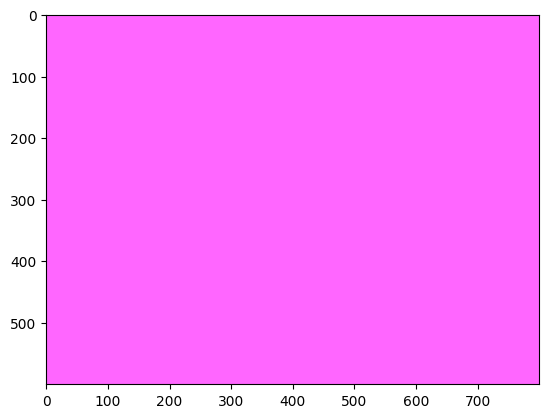

In [16]:
from plantcv import plantcv as pcv 
import numpy as np

# Load the leaf image from the list
img, path, filename = pcv.readimage(filename="../../leafsnap/leafsnap-dataset/dataset/images/field/acer_saccharinum/13001158000696.jpg")

# Convert the image to grayscale
gray_image = pcv.rgb2gray_hsv(img, channel='s')

# Create a binary image using a threshold
binary_image = pcv.threshold.binary(gray_image, threshold=120, max_value=255, object_type='dark')

# Find contours in the binary image
id_objects, obj_hierarchy = pcv.find_objects(binary_image, gray_image)

# # Define a region of interest (ROI) around the leaf
# roi = np.array([[0, 0], [0, 500], [500, 500], [500, 0]])

# # Print the number of contours found
# print('Number of contours found:', len(contours))

# # Decide which objects to keep
# roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
#                                                                roi_hierarchy=roi_hierarchy, 
#                                                                object_contour=id_objects, 
#                                                                obj_hierarchy=obj_hierarchy,
#                                                                roi_type='partial')

#                                                                # Decide which objects to keep
# roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
#                                                                roi_hierarchy=roi_hierarchy, 
#                                                                object_contour=id_objects, 
#                                                                obj_hierarchy=obj_hierarchy,
#                                                                roi_type='partial')
                                                               
# # Draw the contours on the original image
# pcv.draw_contour(leaf_image, contours)

# # Display the final image
# pcv.visualize.colorize_components(leaf_image, contours)

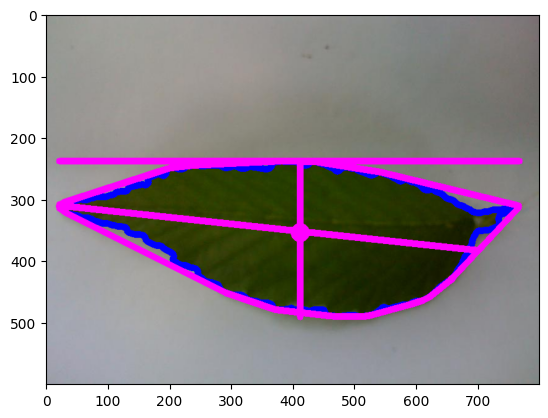

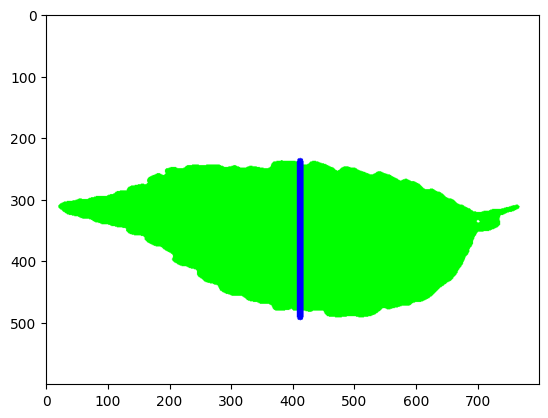

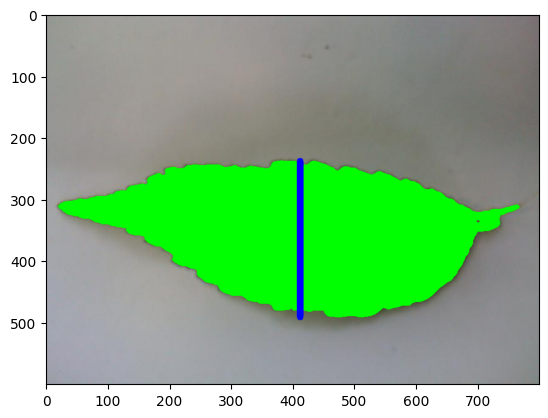

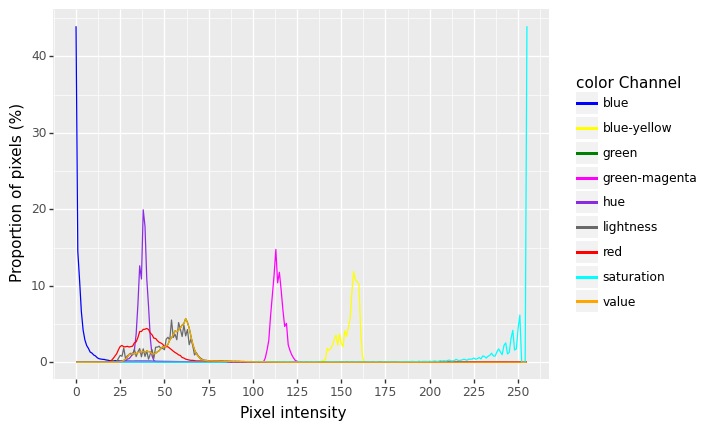

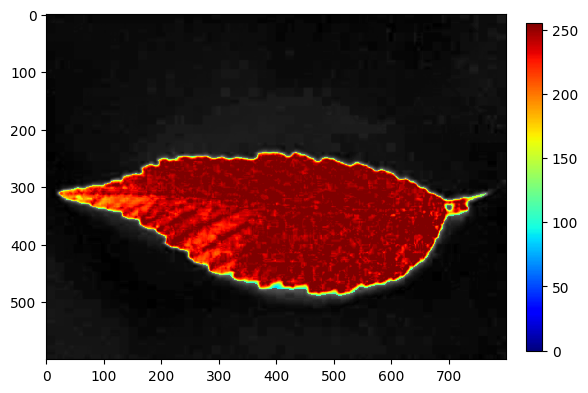

Deprecation warning: plantcv.print_results will be removed in a future version.
             Please use plantcv.outputs.save_results instead.
          


In [46]:
outfile=False
if args.writeimg == True:
    outfile = args.outdir + "/" + filename

# Find shape properties, output shape image (optional)
shape_imgs = pcv.analyze_object(img=img, obj=obj, mask=mask)

# Shape properties relative to user boundary line (optional)
boundary_img1 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, line_position=1680)

# Determine color properties: Histograms, Color Slices, output color analyzed histogram (optional)
color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, hist_plot_type='all')

# Pseudocolor the grayscale image
pseudocolored_img = pcv.visualize.pseudocolor(gray_img=s, mask=kept_mask, cmap='jet')

# Write shape and color data to results file
pcv.print_results(filename=args.result)

In [16]:
import plantcv.parallel

config = plantcv.parallel.WorkflowConfig()
config.save_config(config_file="features_workflow.json")

In [18]:
import plantcv.workflow

plantcv.workflow("features_workflow.json")

SyntaxError: invalid syntax (1311840626.py, line 1)

In [47]:
import plantcv.utils

plantcv.utils.json2csv('features_metadata.json', csv_file="results.csv")

ValueError: Invalid JSON file: features_metadata.json

# PCV Copy of Curvature

In [115]:
def curvature(x, y, xc, yc, r):
    # Shift coordinates to make the center of the circle the origin
    x_shifted = x - xc
    y_shifted = y - yc
    # Calculate distance from each point to the center of the circle
    d = np.sqrt(x_shifted**2 + y_shifted**2)
    # Calculate the curvature only for points inside the circle
    inside_circle = d <= r
    dx_dt = np.gradient(x[inside_circle])
    dy_dt = np.gradient(y[inside_circle])
    d2x_dt2 = np.gradient(dx_dt)
    d2y_dt2 = np.gradient(dy_dt)
    curvature = (dx_dt * d2y_dt2 - d2x_dt2 * dy_dt) / (dx_dt**2 + dy_dt**2)**(3/2)
    # Pad the curvature array with zeros for the points outside the circle
    curvature_padded = np.zeros_like(d)
    curvature_padded[inside_circle] = curvature
    return curvature_padded


def integral_curvature(x, y, xc, yc, r):
    k = curvature(x, y, xc, yc, r)
    return cumtrapz(k, initial=0)


def get_integral_curvature(i,x,y, r):
    # Calculate the integral curvature for a circle centered at (x[i], y[i]) with radius r
    int_curv = integral_curvature(x, y, x[i], y[i], r)[-1]
    return int_curv


def get_area_measure(contour,i,radius, thresh):
    # Approximate the contour with a circle centered at the current point
    circle_mask = np.zeros_like(gray)
    intersection_mask = cv2.bitwise_and(circle_mask, thresh)
    intersection_area = np.sum(intersection_mask) / 255
    circle_area = np.pi * radius ** 2
    intersection_fraction = intersection_area / circle_area
    # Compute the curvature value for the current point
    return intersection_fraction


def get_curvature_arc_length(contour,i,x,y,radius,circle_perimeters):
    curvature_arr = []
    # Approximate the contour with a circle centered at the current point
    (cx, cy) = x[i], y[i]
    # Calculate the length of the part of the circle's circumference that is inside the object
    chord_length = 2 * np.sqrt(radius**2 - ((radius**2-(x[i]-cx)**2-(y[i]-cy)**2))/4)
    arc_length = 2 * np.arcsin(chord_length / (2 * radius))
    circle_perimeters.append(arc_length)
    if len(circle_perimeters) > 0:
        # Calculate the average perimeter of the fitted circles
        circle_perimeter = np.mean(circle_perimeters)
    else:
        # Use the radius as an estimate for the perimeter
        circle_perimeter = 2 * np.pi * radius

    # Calculate perimeter of the contour
    contour_perimeter = cv2.arcLength(contour, True)
    # Calculate the fraction of the circle's perimeter contained inside the object
    fraction = circle_perimeter / contour_perimeter
    arc_len = fraction * arc_length
    return arc_len


def get_curvatures(contours, radius_arr, thresh):
    curvature_arr=[]
    # Loop over each contour
    for cont in contours:
        for contoure in cont:
            contoure2 = [contoure]
            contour = [[[contoure2[0][0][0], contoure2[0][0][1]]]]
            curr = []
            # Precompute the coordinates of all points in the contour
            x, y = contour[0][0][0], contour[0][0][1]          # Compute the maximum and minimum x and y coordinates of the contour
            min_x, max_x = np.min(x), np.max(x)
            min_y, max_y = np.min(y), np.max(y)
            # Compute the thresholded image for the current contour
            mask = np.zeros_like(gray)
            thresh = cv2.bitwise_and(gray, mask)
            # Compute the area measure for each point in the contour
            for radius in radius_arr:
                circle_perimeters = []
                arc_length = 0  # Initialize arc_length to 0
                curr = []
                for i in range(len([contour[0][0][0], contour[0][0][1]])):
                    curr_area = get_area_measure([contour[0][0][0], contour[0][0][1]],i,radius,thresh)
                    curr_arc = get_curvature_arc_length([contour[0][0][0], contour[0][0][1]],i,x,y,radius,circle_perimeters)
                    print(circle_perimeters)
                    curr_int = get_integral_curvature(i,x,y, radius)
                    curr.append(curr_area) # remove
                    #curr.append(curr_arc)
                    #curr.append(curr_int) # add
                curvature_arr.append(curr)
            

            
    return curvature_arr
            #print( f'area={curr_area} arc ={curr_arc} curr int = {curr_int}')

RGB to HSV
Threshold Saturation Image
Median Blur
Extract Blue Channel
Threshold Blue Image
Join Thresholded saturation and blue-yellow imaes
Apply Mask
Extract green-magenta and blue-yellow channels
Thresold Green-magenda and blue images
Join Threshold saturation and blue-yellow images
Fill small objects
Apply 2nd Masked
Skeletonize
Identify Objects original
(array([[[275, 119]],

       [[275, 120]],

       [[274, 121]],

       ...,

       [[278, 121]],

       [[277, 120]],

       [[276, 119]]], dtype=int32),)
Contour 1: Area Measure = 83011.0, Arc Length Measure = 3669.1496107578278


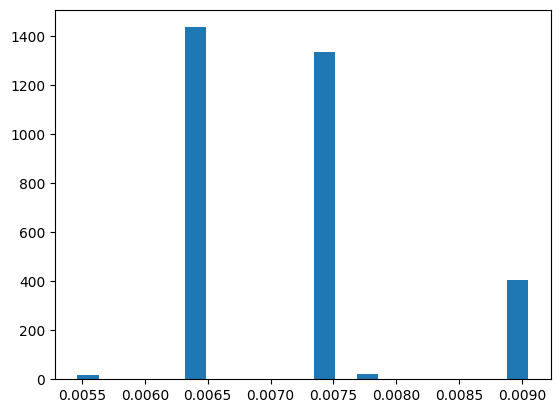

In [136]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
import scipy.integrate
import math
from math import pi
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

# img, path, filename = pcv.readimage(filename=args.image)
img, path, filename = pcv.readimage(filename="../../leafsnap/leafsnap-dataset/dataset/images/field/acer_saccharinum/13001158000696.jpg")

# Convert RGB to HSV and extract the saturation channel
gray = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
print("RGB to HSV")
# Threshold the saturation image
s_thresh = pcv.threshold.binary(gray_img=gray, threshold=85, max_value=255, object_type='light')
print("Threshold Saturation Image")
# Median Blur
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=5)
print("Median Blur")
# Convert RGB to LAB and extract the Blue channel
#b = pcv.rgb2gray_lab(gray_img=img, channel='b')
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
print("Extract Blue Channel")
# Threshold the blue image
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
print("Threshold Blue Image")
# Fill small objects
# b_fill = pcv.fill(b_thresh, 10)
# Join the thresholded saturation and blue-yellow images
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)
print("Join Thresholded saturation and blue-yellow imaes")
# Apply Mask (for VIS images, mask_color=white)
#masked = pcv.apply_mask(rgb_img=img, mask=bs, mask_color='white')
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')
print("Apply Mask")
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')
print("Extract green-magenta and blue-yellow channels")
# Threshold the green-magenta and blue images
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')
print("Thresold Green-magenda and blue images")
# Join the thresholded saturation and blue-yellow images (OR)
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)
print("Join Threshold saturation and blue-yellow images")
# Fill small objects
ab_fill = pcv.fill(bin_img=ab, size=200)
print("Fill small objects")
# Apply mask (for VIS images, mask_color=white)
#masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')
print("Apply 2nd Masked")
skeleton = pcv.morphology.skeletonize(mask=masked2)
print("Skeletonize")
# Identify objects
id_objects, hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
print("Identify Objects original")

print((id_objects[0],))

contours = [item for sublist in _contours for item in sublist]



# Define the radius values
radii = [25]

# Define the number of bins for the histogram
nbins = 21

# Loop over the contours
for i, contour in enumerate(id_objects):
    # Get the area and arc length measures using OpenCV
    area_measure = cv2.contourArea(contour)
    arclen_measure = cv2.arcLength(contour, True)

    # Print the area and arc length measures
    print(f"Contour {i+1}: Area Measure = {area_measure}, Arc Length Measure = {arclen_measure}")

    # Compute the curvature values for the contour
    curvature_vals = []
    for radius in radii:
        curvature = []
        for j in range(len(contour)):
            pt1 = contour[j-1][0]
            pt2 = contour[j][0]
            pt3 = contour[(j+1) % len(contour)][0]
            curvature.append(cv2.arcLength(np.array([pt1, pt2, pt3]), True) / (radius**2))
        curvature_vals.append(curvature)

    # Flatten the list of curvature values
    curvature_vals = np.concatenate(curvature_vals).ravel()

    # Plot the histogram over curvature values
    plt.hist(curvature_vals, bins=nbins)

# Show the plot
plt.show()

# # Define the radii to compute the measures for
# radii = [10,20,30,40,50,60,70,80,90,100]

# # Define a function to compute the area and arc length measures for a single contour and radius
# def compute_measures(contour, radius):
#     # Compute the area and perimeter of the circle with the given radius
#     circle_area = pi * radius**2
#     circle_perim = 2 * pi * radius

#     # Create a mask image with the same size as the original image
#     mask = np.zeros_like(img)

#     # Draw the contour on the mask image
#     cv2.drawContours(mask, [contour], 0, 255, -1)

#     # Compute the area of the contour
#     contour_area = cv2.contourArea(contour)

#     # Compute the perimeter of the contour
#     contour_perim = cv2.arcLength(contour, True)

#     # Compute the area measure and arc length measure for the contour and radius
#     area_measure = contour_area / circle_area
#     arc_length_measure = contour_perim / circle_perim

#     # Return the measures
#     return area_measure, arc_length_measure


# measures = []
# for contour in id_objects:
#     for radius in radii:
#         area_measure, arc_length_measure = compute_measures(contour, radius)
#         measures.append((contour, radius, area_measure, arc_length_measure))











# # Define empty lists to store the results
# area_measures = [[] for _ in range(len(radii))]
# arc_length_measures = [[] for _ in range(len(radii))]

# # Loop through each contour and calculate the area measure and arc length measure for each radius
# for i, cnt in enumerate(id_objects):
#     # Calculate the area of the contour
#     area = cv2.contourArea(cnt)

#     # Calculate the perimeter of the contour
#     perimeter = cv2.arcLength(cnt, True)

#     # Loop through each radius and calculate the area measure and arc length measure for each radius
#     for j, radius in enumerate(radii):
#         # Calculate the circular area for the given radius
#         circle_area = math.pi * radius ** 2

#         # Calculate the circular arc length for the given radius
#         circle_arc_length = 2 * math.pi * radius

#         # Calculate the fraction of the circular area and arc length contained within the contour
#         area_measure = area / circle_area
#         arc_length_measure = perimeter / circle_arc_length

#         # Append the results to the appropriate list
#         area_measures[j].append(area_measure)
#         arc_length_measures[j].append(arc_length_measure)

# # Print the results
# print("Area Measures:")
# for i, radius in enumerate(radii):
#     print(f"Radius = {radius}, Area Measures = {area_measures[i]}")

# print("Arc Length Measures:")
# for i, radius in enumerate(radii):
#     print(f"Radius = {radius}, Arc Length Measures = {arc_length_measures[i]}")


In [132]:
measures

[(array([[[275, 119]],
  
         [[275, 120]],
  
         [[274, 121]],
  
         ...,
  
         [[278, 121]],
  
         [[277, 120]],
  
         [[276, 119]]], dtype=int32),
  10,
  264.23221962002646,
  58.396329749581206),
 (array([[[275, 119]],
  
         [[275, 120]],
  
         [[274, 121]],
  
         ...,
  
         [[278, 121]],
  
         [[277, 120]],
  
         [[276, 119]]], dtype=int32),
  20,
  66.05805490500661,
  29.198164874790603),
 (array([[[275, 119]],
  
         [[275, 120]],
  
         [[274, 121]],
  
         ...,
  
         [[278, 121]],
  
         [[277, 120]],
  
         [[276, 119]]], dtype=int32),
  30,
  29.359135513336277,
  19.465443249860403),
 (array([[[275, 119]],
  
         [[275, 120]],
  
         [[274, 121]],
  
         ...,
  
         [[278, 121]],
  
         [[277, 120]],
  
         [[276, 119]]], dtype=int32),
  40,
  16.514513726251653,
  14.599082437395301),
 (array([[[275, 119]],
  
         [[275, 120]],
  
     

In [120]:
id_objects

[array([[[275, 119]],
 
        [[275, 120]],
 
        [[274, 121]],
 
        ...,
 
        [[278, 121]],
 
        [[277, 120]],
 
        [[276, 119]]], dtype=int32)]

In [5]:
id_hierarchy

NameError: name 'id_hierarchy' is not defined

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the features extracted from the database of lab and field images
database_features = np.load("path/to/database_features.npy")

# Create a nearest neighbors object with n_neighbors set to 25
nbrs = NearestNeighbors(n_neighbors=25, algorithm='auto', metric='hik').fit(database_features)

# Use the HoCS feature vector extracted from the input image as the query
query = HoCS.reshape(1, -1)

# Perform the nearest neighbors search
distances, indices = nbrs.kneighbors(query)
import matplotlib.pyplot as plt
from PIL import Image

# Load the list of species labels
species_labels = np.load("path/to/species_labels.npy")

# Show the top 25 matches to the user
for i in range(len(indices[0])):
    index = indices[0][i]
    distance = distances[0][i]
    species = species_labels[index]
    image_path = "path/to/images/" + str(index) + ".jpg" # Assuming the images are named as their corresponding index in the database

    # Load and show the matched image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.show()

    # Print the match information
    print("Match", i+1, ":", species, "(Distance:", distance, ")")
# Assuming that you have already loaded the database of features and the list of species labels
# as numpy arrays called database_features and species_labels, respectively

from sklearn.model_selection import LeaveOneOut

# Perform leave-one-image-out species identification using only the field images as queries
loo = LeaveOneOut()

correct_ranks = []
for train_index, test_index in loo.split(database_features):
    # Only use field images as queries
    if "field" not in image_paths[test_index[0]]:
        continue

    # Extract the HoCS feature vector from the query image
    query = database_features[test_index[0]]

    # Perform the nearest neighbors search
    distances, indices = nbrs.kneighbors(query.reshape(1, -1))

    # Get the species labels of the matches
    match_species = species_labels[indices[0]]

    # Get the true species label of the query image
    true_species = species_labels[test_index[0]]

    # Calculate the species match rank
    rank = np.where(match_species == true_species)[0][0] + 1

    correct_ranks.append(rank)

# Calculate the recognition rate as a function of the maximum species match rank
recognition_rates = []
for i in range(1, 26):
    recognition_rate = sum([1 for rank in correct_ranks if rank <= i]) / len(correct_ranks)
    recognition_rates.append(recognition_rate)

